# Pandas #03

In [1]:
import pandas as pd

In [3]:
path = "../problems/pandas01/gapminder-FiveYearData.csv"
df = pd.read_csv(path, header=0)
df.head(20)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
5,Afghanistan,1977,14880372.0,Asia,38.438,786.113360
6,Afghanistan,1982,12881816.0,Asia,39.854,978.011439
7,Afghanistan,1987,13867957.0,Asia,40.822,852.395945
8,Afghanistan,1992,16317921.0,Asia,41.674,649.341395
9,Afghanistan,1997,22227415.0,Asia,41.763,635.341351


# Groupby

In [8]:
df.groupby("country")[["pop", "lifeExp"]].agg("mean")

,pop,lifeExp
country,,
Afghanistan,1.582372e+07,37.478833
Albania,2.580249e+06,68.432917
Algeria,1.987541e+07,59.030167
Angola,7.309390e+06,37.883500
Argentina,2.860224e+07,69.060417
...,...,...
Vietnam,5.456857e+07,57.479500
West Bank and Gaza,1.848606e+06,60.328667
Yemen Rep.,1.084319e+07,46.780417


## Multi-index

In [90]:
df_temp = df.groupby(["continent", "country"]).agg("mean")
df_temp

year           pop    lifeExp     gdpPercap
continent country                                                      
Africa    Algeria         1979.5  1.987541e+07  59.030167   4426.025973
          Angola          1979.5  7.309390e+06  37.883500   3607.100529
          Benin           1979.5  4.017497e+06  48.779917   1155.395107
          Botswana        1979.5  9.711862e+05  54.597500   5031.503557
          Burkina Faso    1979.5  7.548677e+06  44.694000    843.990665
...                          ...           ...        ...           ...
Europe    Switzerland     1979.5  6.384293e+06  75.565083  27074.334405
          Turkey          1979.5  4.590901e+07  59.696417   4469.453380
          United Kingdom  1979.5  5.608780e+07  73.922583  19380.472986
Oceania   Australia       1979.5  1.464931e+07  74.662917  19980.595634
          New Zealand     1979.5  3.100032e+06  73.989500  17262.622813

[142 rows x 4 columns]

In [93]:
df_temp.loc["Africa", "Angola"]["pop"]

7309390.083333333

## Useful functions

In [20]:
# unique
df.country.unique()

# nunique
df.country.nunique()

# value_counts
df.country.value_counts()

# duplicated
df.country.duplicated()

# count duplicated
df.country.duplicated().sum()

1562

## Practice problem #01
Check whether all countries have data for the same years

In [45]:
df_temp = df.groupby("country")["year"].unique()
unique_years = df.year.unique()

for year_list in df_temp:
    if any(year_list != unique_years):
        print("Mismatch!")
        break

# This check will fail for the following case
# afg = [1, 2, 2, 3]
# unique = [1, 2, 3]

In [58]:
df = df.iloc[:-1]
df.tail()

,country,year,pop,continent,lifeExp,gdpPercap
1698,Zimbabwe,1982,7636524.0,Africa,60.363,788.855041
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


In [64]:
unique_years = df.year.unique().tolist()

# iterate over the countries
for country in df.country.unique():
    # grab the years
    country_years = df[df.country == country].year
    # compare against unique years
    # Note: The order of the conditions matters.
    if len(country_years) != len(unique_years) or any(country_years != unique_years):
    # report any mismatch
        print("Counry:", country)
        print("Mismatch!")
        break

Counry: Zimbabwe
Mismatch!


## Practice problem #02
How many countries are there per continent?

In [70]:
df.groupby("continent")["country"].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

## Practice problem #03
Which continent has the highest mean gdpPercap for the year 2007?

In [84]:
# Filter out the entries from 2007
filter = (df.year == 2007)
df_continent = df[filter]

# Group the table by continent aggregating by "mean" and get the index of the maximum.
df_continent.groupby("continent")["gdpPercap"].agg("mean").idxmax()

'Oceania'

# Pivot

In [95]:
df_temp = df.pivot(index="country", columns="year", values="lifeExp")
df_temp

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Afghanistan,28.801,30.332,31.997,34.020,36.088,38.438,39.854,40.822,41.674,41.763,42.129,43.828
Albania,55.230,59.280,64.820,66.220,67.690,68.930,70.420,72.000,71.581,72.950,75.651,76.423
Algeria,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
Angola,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
Argentina,62.485,64.399,65.142,65.634,67.065,68.481,69.942,70.774,71.868,73.275,74.340,75.320
...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,40.412,42.887,45.363,47.838,50.254,55.764,58.816,62.820,67.662,70.672,73.017,74.249
West Bank and Gaza,43.160,45.671,48.127,51.631,56.532,60.765,64.406,67.046,69.718,71.096,72.370,73.422
Yemen Rep.,32.548,33.970,35.180,36.984,39.848,44.175,49.113,52.922,55.599,58.020,60.308,62.698


In [94]:
df_temp = df.pivot(index=["continent", "country"], columns="year", values="lifeExp")
df_temp

year                        1952    1957    1962    1967    1972    1977  \
continent country                                                          
Africa    Algeria         43.077  45.685  48.303  51.407  54.518  58.014   
          Angola          30.015  31.999  34.000  35.985  37.928  39.483   
          Benin           38.223  40.358  42.618  44.885  47.014  49.190   
          Botswana        47.622  49.618  51.520  53.298  56.024  59.319   
          Burkina Faso    31.975  34.906  37.814  40.697  43.591  46.137   
...                          ...     ...     ...     ...     ...     ...   
Europe    Switzerland     69.620  70.560  71.320  72.770  73.780  75.390   
          Turkey          43.585  48.079  52.098  54.336  57.005  59.507   
          United Kingdom  69.180  70.420  70.760  71.360  72.010  72.760   
Oceania   Australia       69.120  70.330  70.930  71.100  71.930  73.490   
          New Zealand     69.390  70.260  71.240  71.520  71.890  72.220   

year                        1982    1987    1992    1997    2002    2007  
continent country                                                         
Africa    Algeria         61.368  65.799  67.744  69.152  70.994  72.301  
          Angola          39.942  39.906  40.647  40.963  41.003  42.731  
          Benin           50.904  52.337  53.919  54.777  54.406  56.728  
          Botswana        61.484  63.622  62.745  52.556  46.634  50.728  
          Burkina Faso    48.122  49.557  50.260  50.324  50.650  52.295  
...                          ...     ...     ...     ...     ...     ...  
Europe    Switzerland     76.210  77.410  78.030  79.370  80.620  81.701  
          Turkey          61.036  63.108  66.146  68.835  70.845  71.777  
          United Kingdom  74.040  75.007  76.420  77.218  78.471  79.425  
Oceania   Australia       74.740  76.320  77.560  78.830  80.370  81.235  
          New Zealand     73.840  74.320  76.330  77.550  79.110  80.204  

[142 rows x 12 columns]

# Plotting

<Axes: title={'center': 'Countries per continent'}, xlabel='Continent', ylabel='Frequency'>

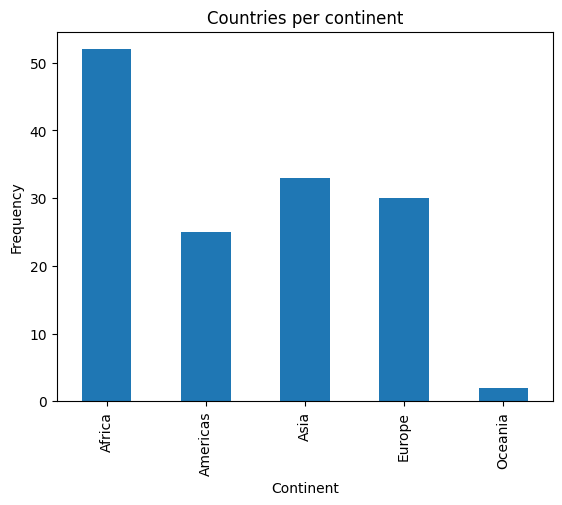

In [130]:
# Matplotlib, Seaborn, Plotly
temp = df.groupby("continent")[["country"]].nunique()
# Countries per continent
temp.plot(
    kind="bar",
    title="Countries per continent",
    xlabel="Continent",
    ylabel="Frequency",
    legend=False,
)

# Practice problem #04
How has the population of India changed over time?

<Axes: title={'center': 'Population of India'}, xlabel='Year', ylabel='Population'>

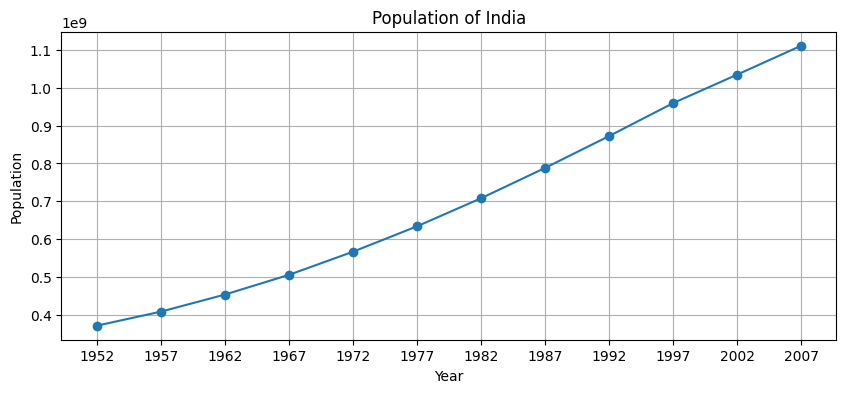

In [143]:
df_country = df[df.country == "India"]

df_country.plot(
    figsize=(10, 4),
    kind="line",
    x="year",
    y="pop",
    marker="o",
    title="Population of India",
    xlabel="Year",
    ylabel="Population",
    grid=True,
    legend=False,
    xticks=df.year.unique(),
)

# Practice problem #05
Distribution of African gdpPercap for year 2007

<Axes: title={'center': 'gdpPercap distribution of Asia in 2007'}>

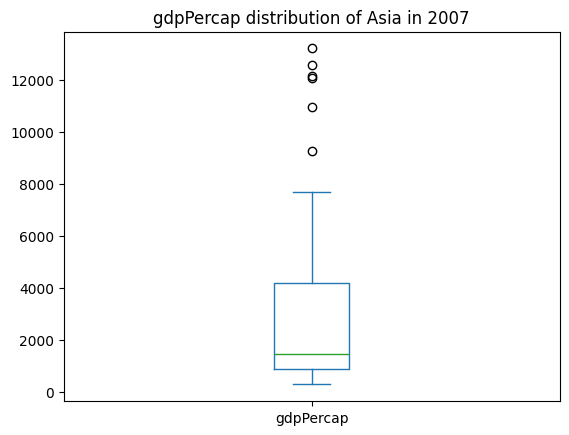

In [148]:
df[(df.continent == "Africa") & (df.year == 2007)].plot(
    kind = "box",
    y = "gdpPercap",
    title="gdpPercap distribution of Asia in 2007",
    grid=False,
    legend=False,
)

<Axes: title={'center': 'gdpPercap distribution of Asia in 2007'}, ylabel='Frequency'>

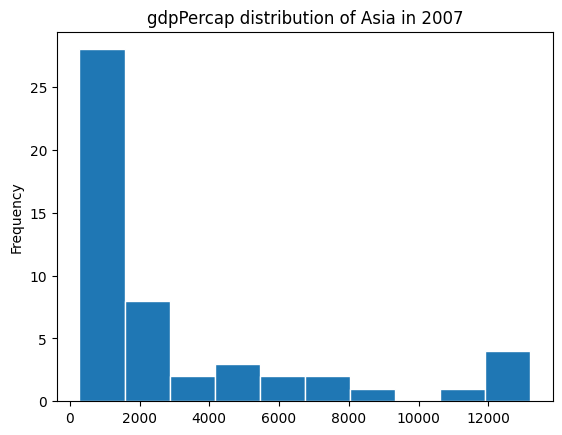

In [151]:
df[(df.continent == "Africa") & (df.year == 2007)].plot(
    kind = "hist",
    bins=10,
    y = "gdpPercap",
    title="gdpPercap distribution of Asia in 2007",
    grid=False,
    legend=False,
    ec="white"
)